In [2]:
from image_helpers import *
import matplotlib.pyplot as plt

In [14]:
data_dir = 'training/'
train_data_filename = data_dir + 'images/'
label_data_filename = data_dir + 'groundtruth/'

# Extract it into numpy arrays.
FILE_REGEX = "satImage_%.3d"

In [24]:
train_images, label_images = read_rotate_images(train_data_filename, label_data_filename, 20, FILE_REGEX)
print("hello")

Loading training/images/satImage_001.png
Loading training/groundtruth/satImage_001.png
Loading training/images/satImage_002.png
Loading training/groundtruth/satImage_002.png
Loading training/images/satImage_003.png
Loading training/groundtruth/satImage_003.png
Loading training/images/satImage_004.png


Loading training/groundtruth/satImage_004.png
Loading training/images/satImage_005.png
Loading training/groundtruth/satImage_005.png
Loading training/images/satImage_006.png
Loading training/groundtruth/satImage_006.png
Loading training/images/satImage_007.png


Loading training/groundtruth/satImage_007.png
Loading training/images/satImage_008.png
Loading training/groundtruth/satImage_008.png
Loading training/images/satImage_009.png
Loading training/groundtruth/satImage_009.png
Loading training/images/satImage_010.png


Loading training/groundtruth/satImage_010.png
Loading training/images/satImage_011.png
Loading training/groundtruth/satImage_011.png
Loading training/images/satImage_012.png
Loading training/groundtruth/satImage_012.png


Loading training/images/satImage_013.png
Loading training/groundtruth/satImage_013.png
Loading training/images/satImage_014.png
Loading training/groundtruth/satImage_014.png
Loading training/images/satImage_015.png


Loading training/groundtruth/satImage_015.png
Loading training/images/satImage_016.png
Loading training/groundtruth/satImage_016.png
Loading training/images/satImage_017.png
Loading training/groundtruth/satImage_017.png
Loading training/images/satImage_018.png


Loading training/groundtruth/satImage_018.png
Loading training/images/satImage_019.png
Loading training/groundtruth/satImage_019.png
Loading training/images/satImage_020.png
Loading training/groundtruth/satImage_020.png
hello


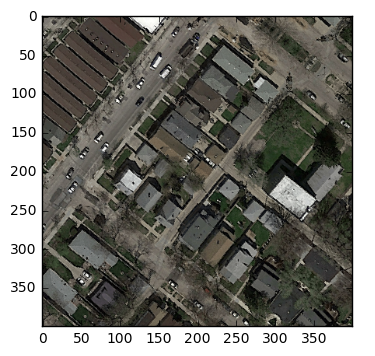

In [26]:
plt.imshow(train_images[8])
plt.show()